# **Ex. No.11 - Create Box Plots and Scatter Plots to Compare Cholesterol Levels Across Age Groups**


---


Niranjana A

220301061

III BME - "A"


---


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/cholesterol.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
print(df.isnull().sum())
print("\nThe shape of the dataframe is:", df.shape)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

The shape of the dataframe is: (4240, 16)


In [ ]:
df.dropna(subset=['totChol'], inplace=True)
print("The shape of the modified dataframe is:", df.shape)

The shape of the modified dataframe is: (4190, 16)


In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
columns_to_drop = ['TenYearCHD', 'prevalentStroke', 'prevalentHyp','diabetes']  # Replace with your column names
df.drop(columns=columns_to_drop, inplace=True)
print("Modified DataFrame:")
print(df)

Modified DataFrame:
      male  age  education  currentSmoker  cigsPerDay  BPMeds  totChol  sysBP  \
0        1   39        4.0              0         0.0     0.0    195.0  106.0   
1        0   46        2.0              0         0.0     0.0    250.0  121.0   
2        1   48        1.0              1        20.0     0.0    245.0  127.5   
3        0   61        3.0              1        30.0     0.0    225.0  150.0   
4        0   46        3.0              1        23.0     0.0    285.0  130.0   
...    ...  ...        ...            ...         ...     ...      ...    ...   
4235     0   48        2.0              1        20.0     NaN    248.0  131.0   
4236     0   44        1.0              1        15.0     0.0    210.0  126.5   
4237     0   52        2.0              0         0.0     0.0    269.0  133.5   
4238     1   40        3.0              0         0.0     0.0    185.0  141.0   
4239     0   39        3.0              1        30.0     0.0    196.0  133.0   

      d

In [ ]:
# Define age bin edges and labels
age_bins = [30, 40, 50, 60, 70, 80]  # Customize as needed
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new 'age_group' column with the bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

<ipython-input-59-17232b693959>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_boxes)  # Choose your colormap


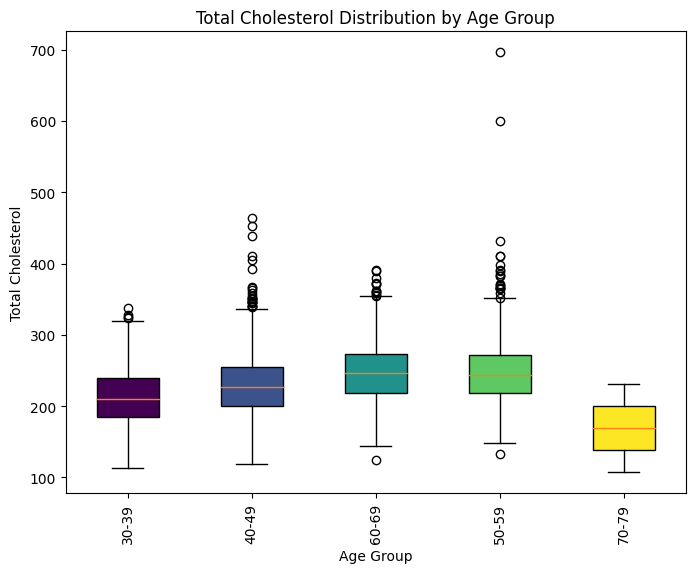

In [ ]:
# Box plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
bp = plt.boxplot([df['totChol'][df['age_group'] == group] for group in df['age_group'].unique()],
            labels=df['age_group'].unique(), patch_artist=True) # set patch_artist to True
num_boxes = len(df['age_group'].unique())
cmap = cm.get_cmap('viridis', num_boxes)  # Choose your colormap
for i, box in enumerate(bp['boxes']):
    box.set_facecolor(cmap(i))
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.ylabel('Total Cholesterol')
plt.title('Total Cholesterol Distribution by Age Group')
plt.show()

<ipython-input-62-d4721040ba34>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_groups)  # Choose your colormap


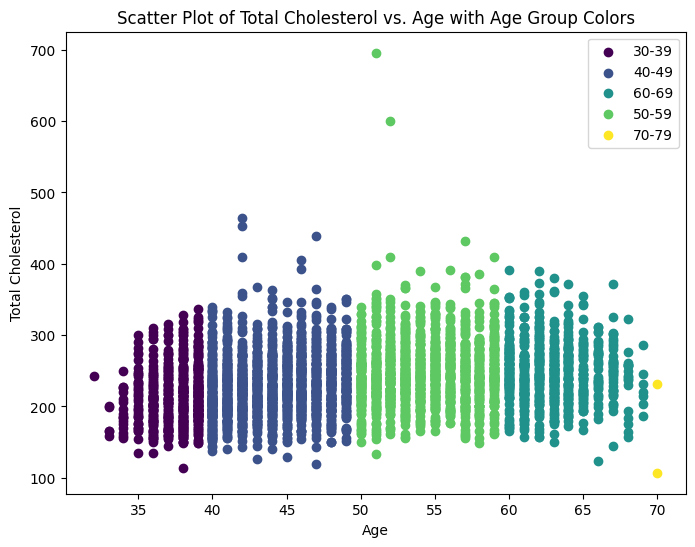

In [ ]:
# Scatter plot with colors based on age_group
plt.figure(figsize=(8, 6))

# Get unique age groups and assign a color to each
age_groups = df['age_group'].unique()
num_groups = len(age_groups)
cmap = cm.get_cmap('viridis', num_groups)  # Choose your colormap

# Create a color mapping dictionary
color_mapping = {group: cmap(i) for i, group in enumerate(age_groups)}

# Scatter plot with colors
for group, color in color_mapping.items():
    group_data = df[df['age_group'] == group]
    plt.scatter(group_data['age'], group_data['totChol'], c=[color], label=group)

plt.xlabel('Age')  # Changed to 'Age' for clarity
plt.ylabel('Total Cholesterol')
plt.title('Scatter Plot of Total Cholesterol vs. Age with Age Group Colors')
plt.legend()  # Add a legend to show the color mapping
plt.show()